## Analysis of the Churn Modelling Dataset with Neural networks
How to select number of hidden layers in neural network

### Introduction

#### What Is Churn Rate ?
The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period. It is also the rate at which employees leave their jobs within a certain period. For a company to expand its clientele, its growth rate (measured by the number of new customers) must exceed its churn rate.

Customer churn is an imperative issue that is frequently connected with the existing cycle of the business.In recent year, churn prediction is becoming a very important issue in Banking and telecom industry. In order to deal with this problem, the industry must recognize these customers before they churn. Therefore, developing a unique classifier that will predict future churns is vital.

#### Objective 

To determine whether person will exit the bank or not based on all the dependent features. This will be done using Neural Networks.


### Importing necessary libraries

In [216]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objs as px
import plotly.express as ex
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
%matplotlib inline

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Embedding,Flatten,LeakyReLU,BatchNormalization,Dropout
from keras.activations import relu,sigmoid
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Feature Scaling and metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split



### Importing the dataset

In [41]:
data = pd.read_csv('Churn_Modelling.csv')

In [42]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Summary about the features and their types in the dataset

1) RowNumber : Serial number

2) CustomerId : Unique Ids for bank customer identification

3) Surname : Customer's last name

4) CreditScore : Credit score of the customer

5) Geography : The country to which the customer belongs

6) Gender : Male or Female

7) Age : The age of the customer

8) Tenure : Number of years for which the customer has been with the bank

9) Balance : Bank balance of the customer

10) NumOfProducts : Number of bank products the customer is utilising

11) HasCrCard : Binary Flag for whether the customer holds a credit card with the bank or not

12) IsActiveMember : Binary Flag for whether the customer is an active member with the bank or not

13) EstimatedSalary : Estimated salary of the customer in Dollars

14) Exited : Binary flag 1 if the customer closed account with bank and 0 if the customer is retained

### Exploring the dataset

We will be looking at the 
- Shape of dataset 
- Handling Duplicate / Null Values if any
- Handling outliers if any

In [137]:
print("Shape of data: ",data.shape)

Shape of data:  (10000, 14)


There are 10000 rows and 14 columns in the dataset.

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [140]:
# Check for duplicate values
data.duplicated().sum()

0

In [141]:
# Check for null values
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no missing values or duplicate values in the dataset.

In [143]:
# Drop columns which do not have a significant impact on dataset
data.drop(['RowNumber','CustomerId','Surname'],axis = 1,inplace = True)

In [144]:
# This gives a statistical analysis of the data
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Exploratory Data Analysis

##### Churn vs Not Churn customers

Text(0.5, 1.0, 'Churned vs Not Churned customers')

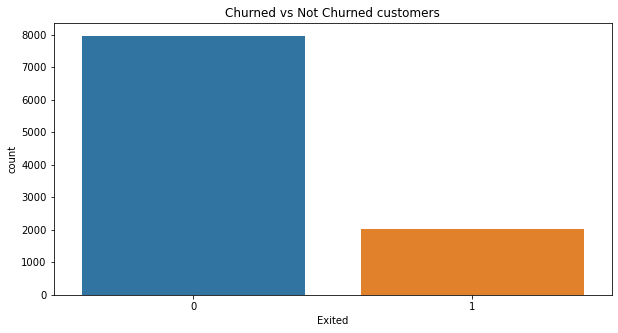

In [158]:
plt.figure(figsize=(10,5))
sns.countplot(x='Exited',data = data)
plt.title('Churn vs Not Churn customers')

We can see that 20% left the company while 80% of the data represents the customers who did not leave the company.

##### Churn vs Not Churn customers w.r.t Gender

Text(0.5, 1.0, 'Churned vs Not Churned customers w.r.t Gender')

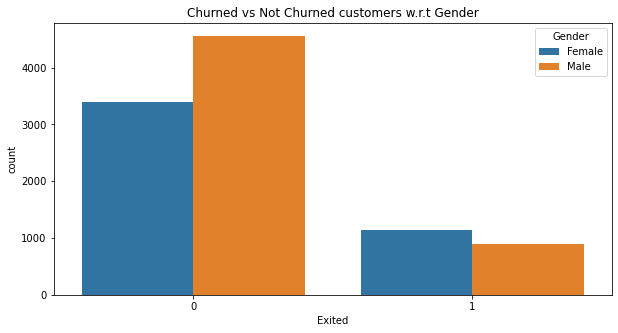

In [159]:
plt.figure(figsize=(10,5))
sns.countplot(x='Exited',hue='Gender',data = data)
plt.title('Churn vs Not Churn customers w.r.t Gender')

We can observe that there are more number of female customers retained by the company.

##### Churn vs Not Churn customers w.r.t country

Text(0.5, 1.0, 'Churned vs Not Churned customers w.r.t country')

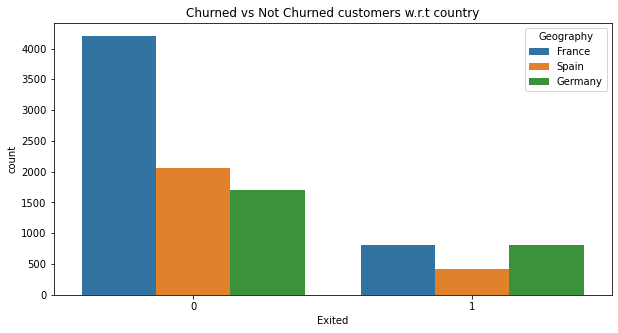

In [162]:
plt.figure(figsize=(10,5))
sns.countplot(x='Exited',hue='Geography',data = data)
plt.title('Churn vs Not Churn customers w.r.t country')

We can see that more number of customers from France and Germany exited the company.

##### Credit card usage according to country

Text(0.5, 1.0, 'Credit card usage according to country')

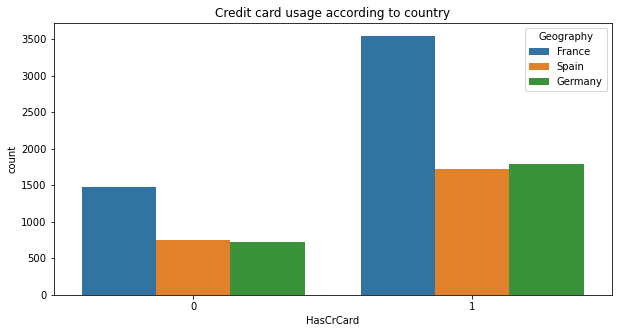

In [167]:
plt.figure(figsize=(10,5))
sns.countplot(x='HasCrCard',hue='Geography',data = data)
plt.title('Credit card usage according to country')

A significant number of customers from France holds a credit card with the bank compared to Spain and Germany.

##### Credit card usage according to gender

Text(0.5, 1.0, 'Credit card usage according to gender')

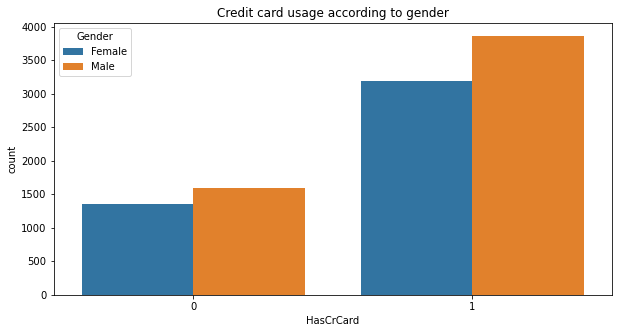

In [166]:
plt.figure(figsize=(10,5))
sns.countplot(x='HasCrCard',hue='Gender',data = data)
plt.title('Credit card usage according to gender')

Proportionality of customer having credit card against gender is almost equal.

##### Country with highest credit score

In [188]:

fig = ex.box(data, x="Exited", y="CreditScore", color = 'Geography')
fig.update_layout(title_text='Country with highest credit score')
fig.show()

##### Country with highest estimated salary

In [189]:
fig = ex.box(data, x="Exited", y="CreditScore", color = 'Geography')
fig.update_layout(title_text='Country with highest estimated salary')
fig.show()

Credit score and estimated salary do not have a significant impact on exit rates.

##### Distribution of Credit score of customer

Text(0.5, 1.0, 'Distribution of Credit score of customer')

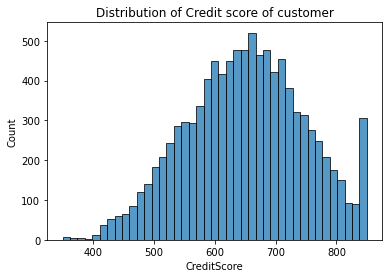

In [194]:
sns.histplot(
    data,
    x="CreditScore")
plt.title('Distribution of Credit score of customer')

##### Distribution of Customer Age

Text(0.5, 1.0, 'Distribution of Customer Age')

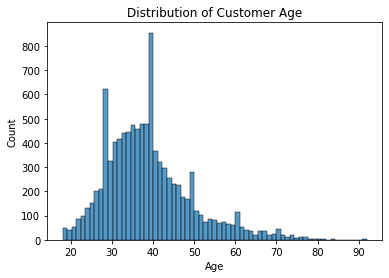

In [195]:
sns.histplot(
    data,
    x="Age")
plt.title('Distribution of Customer Age')

<AxesSubplot:>

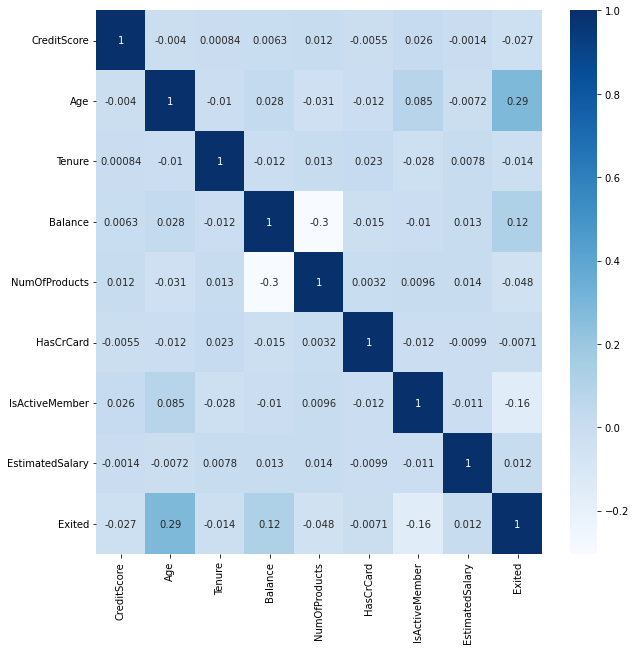

In [201]:
# Correlation between features using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

### Data Preprocessing

In [43]:
X = data.iloc[:,3:13].values
y = data.iloc[:,13].values

## Approach 1

### Encoding the categorical data

In [44]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [45]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [46]:
data['HasCrCard'].unique()

array([1, 0])

In [47]:
data['IsActiveMember'].unique()

array([1, 0])

In [48]:
le1 = LabelEncoder()
le2 = LabelEncoder()
X[:,1] = le1.fit_transform(X[:,1])
X[:,2] = le2.fit_transform(X[:,2])
ohe = OneHotEncoder()
X = ohe.fit_transform(X)
X = X.toarray()
X=X[:,1:]

### Splitting into training and test set

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [50]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Data Modelling

In [108]:
model = Sequential()

model.add(Dense(75,input_dim=X_train.shape[1],activation='relu'))

model.add(Dense(50))
model.add(LeakyReLU(alpha=0.05))
model.add(Dropout(0.50))

model.add(Dense(20,activation='relu'))
model.add(Dropout(0.50))

model.add(Dense(10,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [124]:
model.fit(X_train,y_train,batch_size=400,epochs = 30)

Epoch 1/30
8000/8000 [==============================] - 1s 141us/step - loss: 0.1230 - accuracy: 0.8495
Epoch 2/30
8000/8000 [==============================] - 1s 113us/step - loss: 0.1166 - accuracy: 0.8475
Epoch 3/30
8000/8000 [==============================] - 1s 100us/step - loss: 0.1117 - accuracy: 0.8426
Epoch 4/30
8000/8000 [==============================] - 1s 104us/step - loss: 0.1186 - accuracy: 0.8435
Epoch 5/30
8000/8000 [==============================] - 1s 126us/step - loss: 0.1049 - accuracy: 0.8381
Epoch 6/30
8000/8000 [==============================] - 1s 139us/step - loss: 0.1017 - accuracy: 0.8399
Epoch 7/30
8000/8000 [==============================] - 1s 114us/step - loss: 0.1002 - accuracy: 0.8370
Epoch 8/30
8000/8000 [==============================] - 1s 103us/step - loss: 0.0806 - accuracy: 0.8335
Epoch 9/30
8000/8000 [==============================] - 1s 104us/step - loss: 0.0848 - accuracy: 0.8332
Epoch 10/30
8000/8000 [==============================] - 1s 101u

### Making the predictions and evaluating the model

In [125]:
pred = model.predict(X_test)

In [126]:
y_pred = (pred > 0.5)

In [127]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[1588    7]
 [ 394   11]]
0.7995
